# Data Preparation


In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
"""
Write dataframe object into a csv file
XXXXX.to_csv('XXXXX.csv', index=False)
Please replace XXXXX with your dataframe variable and name of the csv file.
"""
df = pd.read_csv("School-Age-Digital-Connectivity-A1data.csv", header = 1)
df.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),24%,9%,32%,1%,77%,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),17%,2%,24%,0%,62%,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,71%,88%,47%,99%,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),37%,33%,52%,9%,76%,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),66%,61%,69%,10%,98%,Multiple Indicator Cluster Survey,2012


#### 5 Types of Errors to look for:

1. Missing Values
2. Whitesaces
3. Data types
4. Typos
5. Impossible Values

In [5]:
# Stripping whitespaces from column names
df.columns = df.columns.str.strip()

# Stripping whitespaces from string values in the dataframe
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].str.strip()

df.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),24%,9%,32%,1%,77%,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),17%,2%,24%,0%,62%,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,71%,88%,47%,99%,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),37%,33%,52%,9%,76%,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),66%,61%,69%,10%,98%,Multiple Indicator Cluster Survey,2012


In [6]:
missing_values = df.isnull().sum()
missing_values

ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Rural (Residence)            2
Urban (Residence)            0
Poorest (Wealth quintile)    6
Richest (Wealth quintile)    7
Data source                  0
Time period                  0
dtype: int64

In [7]:
column_statistics = {}

for column in df.columns:
    column_data = df[column]
    stats = {
        'Number of Unique Values': column_data.nunique(),
        'Unique Values (Sample)': column_data.unique()[:10],
        'Data Type': column_data.dtypes
    }
    column_statistics[column] = stats

column_statistics_df = pd.DataFrame(column_statistics).transpose()
column_statistics_df

,Number of Unique Values,Unique Values (Sample),Data Type
ISO3,76,"[DZA, AGO, ARM, BGD, BRB, BEN, BOL, BIH, BRA, ...",object
Countries and areas,76,"[Algeria, Angola, Armenia, Bangladesh, Barbado...",object
Region,6,"[MENA, SSA, ECA, SA, LAC, EAP]",object
Sub-region,7,"[MENA, ESA, EECA, SA, LAC, WCA, EAP]",object
Income Group,5,"[Upper middle income (UM), Lower middle income...",object
Total,53,"[24%, 17%, 81%, 37%, 66%, 4%, 12%, 59%, 83%, 76%]",object
Rural (Residence),40,"[9%, 2%, 71%, 33%, 61%, 1%, 4%, 51%, 66%, 0%]",object
Urban (Residence),52,"[32%, 24%, 88%, 52%, 69%, 7%, 17%, 76%, 89%, 81%]",object
Poorest (Wealth quintile),34,"[1%, 0%, 47%, 9%, 10%, nan, 8%, 84%, 35%, 73%]",object
Richest (Wealth quintile),44,"[77%, 62%, 99%, 76%, 98%, 16%, nan, 96%, 97%, 5%]",object


In [8]:
# fixing/convert datatypes to correct types
percentage_columns = ["Total", "Rural (Residence)", "Urban (Residence)", "Poorest (Wealth quintile)", "Richest (Wealth quintile)"]

for column in percentage_columns:
    df[column] = df[column].str.rstrip('%').astype('float')
df.dtypes
df.head(10)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),24.0,9.0,32.0,1.0,77.0,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),17.0,2.0,24.0,0.0,62.0,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81.0,71.0,88.0,47.0,99.0,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),37.0,33.0,52.0,9.0,76.0,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),66.0,61.0,69.0,10.0,98.0,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),4.0,1.0,7.0,0.0,16.0,Demographic and Health Survey,2017-18
6,BOL,Bolivia,LAC,LAC,Lower middle income (LM),12.0,4.0,17.0,NaN,NaN,EDSA,2016
7,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),59.0,51.0,76.0,8.0,96.0,Multiple Indicator Cluster Survey,2011-12
8,BRA,Brazil,LAC,LAC,Upper middle income (UM),83.0,51.0,89.0,84.0,97.0,Brazil Continuous National Household Sample Su...,2018
9,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),76.0,66.0,81.0,35.0,97.0,Bulgarian Longitudinal Inclusive Society Surve...,2013


In [9]:
# Replacing missing values in the specified columns with their respective medians
for col in ['Rural (Residence)', 'Poorest (Wealth quintile)', 'Richest (Wealth quintile)']:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Converting these columns to integer after replacing missing values
for col in ['Rural (Residence)', 'Poorest (Wealth quintile)', 'Richest (Wealth quintile)', 'Total','Urban (Residence)']:
    df[col] = df[col].astype(int)

df.dtypes

ISO3                         object
Countries and areas          object
Region                       object
Sub-region                   object
Income Group                 object
Total                         int64
Rural (Residence)             int64
Urban (Residence)             int64
Poorest (Wealth quintile)     int64
Richest (Wealth quintile)     int64
Data source                  object
Time period                  object
dtype: object

In [10]:
df.head(10)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),24,9,32,1,77,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),17,2,24,0,62,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81,71,88,47,99,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),37,33,52,9,76,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),66,61,69,10,98,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),4,1,7,0,16,Demographic and Health Survey,2017-18
6,BOL,Bolivia,LAC,LAC,Lower middle income (LM),12,4,17,3,77,EDSA,2016
7,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),59,51,76,8,96,Multiple Indicator Cluster Survey,2011-12
8,BRA,Brazil,LAC,LAC,Upper middle income (UM),83,51,89,84,97,Brazil Continuous National Household Sample Su...,2018
9,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),76,66,81,35,97,Bulgarian Longitudinal Inclusive Society Surve...,2013


In [11]:
# Checking for duplicate rows in the dataframe
duplicate_rows = df[df.duplicated()]

duplicate_rows

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
70,TUR,Turkey,ECA,EECA,Upper middle income (UM),36,14,43,2,90,Demographic and Health Survey,2013
71,TUR,Turkey,ECA,EECA,Upper middle income (UM),36,14,43,2,90,Demographic and Health Survey,2013


In [12]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)


In [13]:
df.dtypes

ISO3                         object
Countries and areas          object
Region                       object
Sub-region                   object
Income Group                 object
Total                         int64
Rural (Residence)             int64
Urban (Residence)             int64
Poorest (Wealth quintile)     int64
Richest (Wealth quintile)     int64
Data source                  object
Time period                  object
dtype: object

In [14]:
# Replacing the typo in the "Income Group" column
df['Income Group'] = df['Income Group'].replace('Lowerr middle income (LM)', 'Lower middle income (LM)')

In [15]:

df['Income Group'].unique()
df.head(10)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),24,9,32,1,77,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),17,2,24,0,62,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81,71,88,47,99,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),37,33,52,9,76,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),66,61,69,10,98,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),4,1,7,0,16,Demographic and Health Survey,2017-18
6,BOL,Bolivia,LAC,LAC,Lower middle income (LM),12,4,17,3,77,EDSA,2016
7,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),59,51,76,8,96,Multiple Indicator Cluster Survey,2011-12
8,BRA,Brazil,LAC,LAC,Upper middle income (UM),83,51,89,84,97,Brazil Continuous National Household Sample Su...,2018
9,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),76,66,81,35,97,Bulgarian Longitudinal Inclusive Society Surve...,2013


In [16]:
unique_values = {col: df[col].unique().tolist() for col in df.columns}

unique_values

{'ISO3': ['DZA',
  'AGO',
  'ARM',
  'BGD',
  'BRB',
  'BEN',
  'BOL',
  'BIH',
  'BRA',
  'BGR',
  'BFA',
  'CMR',
  'CAF',
  'TCD',
  'CHL',
  'CHN',
  'COL',
  'CRI',
  'CIV',
  'CUB',
  'COD',
  'DJI',
  'DOM',
  'EGY',
  'GMB',
  'GEO',
  'GHA',
  'GTM',
  'GNB',
  'HTI',
  'IND',
  'IDN',
  'IRQ',
  'JPN',
  'JOR',
  'KEN',
  'KIR',
  'KGZ',
  'LAO',
  'LSO',
  'MDG',
  'MDV',
  'MLI',
  'MRT',
  'MEX',
  'MNG',
  'MNE',
  'MAR',
  'NAM',
  'NPL',
  'PAK',
  'PAN',
  'RUS',
  'LCA',
  'STP',
  'SEN',
  'SRB',
  'SLE',
  'SSD',
  'LKA',
  'SDN',
  'SUR',
  'TJK',
  'THA',
  'MKD',
  'TGO',
  'TON',
  'TTO',
  'TUN',
  'TUR',
  'TKM',
  'UGA',
  'UKR',
  'UZB',
  'ZMB',
  'ZWE'],
 'Countries and areas': ['Algeria',
  'Angola',
  'Armenia',
  'Bangladesh',
  'Barbados',
  'Benin',
  'Bolivia',
  'Bosnia and Herzegovina',
  'Brazil',
  'Bulgaria',
  'Burkina Faso',
  'Cameroon',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Costa Rica',
  'Ivory Coast

In [17]:
# Adjusting the extraction to get the first year from the "Time period" column
df['Time period'] = df['Time period'].str.extract('(\d{4})')

df['Time period'].unique()

array(['2018', '2015', '2019', '2012', '2017', '2016', '2011', '2013',
       '2010', '2014', '2076', '2562'], dtype=object)

In [18]:
df['Time period'] = df['Time period'].astype('int')
df.dtypes

ISO3                         object
Countries and areas          object
Region                       object
Sub-region                   object
Income Group                 object
Total                         int64
Rural (Residence)             int64
Urban (Residence)             int64
Poorest (Wealth quintile)     int64
Richest (Wealth quintile)     int64
Data source                  object
Time period                   int64
dtype: object

In [19]:
# remove rows with impossible time periods
df = df[df['Time period'] <= 2023]

In [20]:
df.head(10)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),24,9,32,1,77,Multiple Indicator Cluster Survey,2018
1,AGO,Angola,SSA,ESA,Lower middle income (LM),17,2,24,0,62,Demographic and Health Survey,2015
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81,71,88,47,99,Demographic and Health Survey,2015
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),37,33,52,9,76,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),66,61,69,10,98,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),4,1,7,0,16,Demographic and Health Survey,2017
6,BOL,Bolivia,LAC,LAC,Lower middle income (LM),12,4,17,3,77,EDSA,2016
7,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),59,51,76,8,96,Multiple Indicator Cluster Survey,2011
8,BRA,Brazil,LAC,LAC,Upper middle income (UM),83,51,89,84,97,Brazil Continuous National Household Sample Su...,2018
9,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),76,66,81,35,97,Bulgarian Longitudinal Inclusive Society Surve...,2013


In [21]:
check = df.info(verbose=True)

print(check)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 77
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ISO3                       74 non-null     object
 1   Countries and areas        74 non-null     object
 2   Region                     74 non-null     object
 3   Sub-region                 74 non-null     object
 4   Income Group               74 non-null     object
 5   Total                      74 non-null     int64 
 6   Rural (Residence)          74 non-null     int64 
 7   Urban (Residence)          74 non-null     int64 
 8   Poorest (Wealth quintile)  74 non-null     int64 
 9   Richest (Wealth quintile)  74 non-null     int64 
 10  Data source                74 non-null     object
 11  Time period                74 non-null     int64 
dtypes: int64(6), object(6)
memory usage: 7.5+ KB
None


In [22]:
df["Time period"].unique()

array([2018, 2015, 2019, 2012, 2017, 2016, 2011, 2013, 2010, 2014])

In [23]:
df = df.drop(columns=['ISO3', 'Region', 'Sub-region', 'Data source', 'Time period'])

# Displaying the first few rows after removing the irrelevant columns
df.head(10)

,Countries and areas,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile)
0,Algeria,Upper middle income (UM),24,9,32,1,77
1,Angola,Lower middle income (LM),17,2,24,0,62
2,Armenia,Upper middle income (UM),81,71,88,47,99
3,Bangladesh,Lower middle income (LM),37,33,52,9,76
4,Barbados,High income (H),66,61,69,10,98
5,Benin,Low income (L),4,1,7,0,16
6,Bolivia,Lower middle income (LM),12,4,17,3,77
7,Bosnia and Herzegovina,Upper middle income (UM),59,51,76,8,96
8,Brazil,Upper middle income (UM),83,51,89,84,97
9,Bulgaria,Upper middle income (UM),76,66,81,35,97


In [24]:
df.describe()

,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile)
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,35.229730,27.513514,42.810811,17.729730,63.135135
std,29.644722,29.583985,30.306957,26.993301,33.471036
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7.500000,2.250000,15.500000,0.000000,34.500000
50%,28.500000,13.500000,40.500000,3.000000,77.000000
75%,58.500000,49.500000,70.500000,22.750000,93.000000
max,94.000000,100.000000,97.000000,100.000000,100.000000


In [25]:
# Saving the cleaned dataframe to a CSV file
cleaned_file_path = "cleaned_A1data.csv"
df.to_csv(cleaned_file_path, index=False)


# Data Exploration

In [26]:
clean_df = pd.read_csv("cleaned_A1data.csv", header = 0)
clean_df.head()

,Countries and areas,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile)
0,Algeria,Upper middle income (UM),24,9,32,1,77
1,Angola,Lower middle income (LM),17,2,24,0,62
2,Armenia,Upper middle income (UM),81,71,88,47,99
3,Bangladesh,Lower middle income (LM),37,33,52,9,76
4,Barbados,High income (H),66,61,69,10,98


## 2.1 Exploring Overall Percentage of children with internet connection

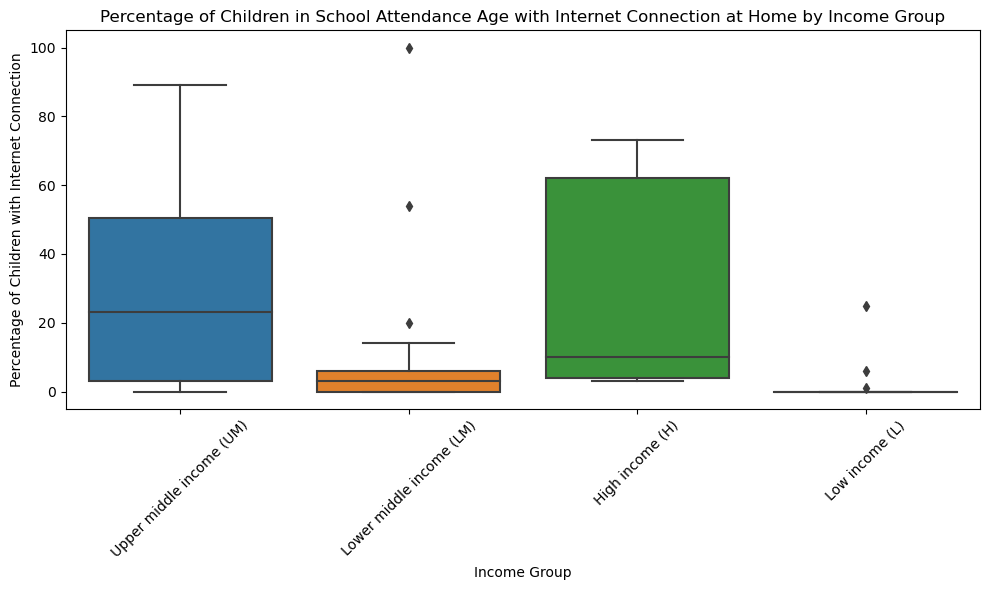

Income Group
High income (H)             30.400000
Low income (L)               2.133333
Lower middle income (LM)     9.111111
Upper middle income (UM)    32.666667
Name: Poorest (Wealth quintile), dtype: float64

In [27]:
# Plotting the side-by-side boxplot for the "Poorest (Wealth quintile)" column grouped by "Income Group"

plt.figure(figsize=(10, 6))
sns.boxplot(x="Income Group", y="Poorest (Wealth quintile)", data=clean_df)
plt.title("Percentage of Children in School Attendance Age with Internet Connection at Home by Income Group")
plt.ylabel("Percentage of Children with Internet Connection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Computing the mean of the "Poorest (Wealth quintile)" for each category of "Income Group"
mean_values = df.groupby("Income Group")["Poorest (Wealth quintile)"].mean()
mean_values

## 2.2 Comparing Median with respect to Residence

In [28]:
# Computing the median for "Rural (Residence)" and "Urban (Residence)"
median_rural = clean_df["Rural (Residence)"].median()
median_urban = clean_df["Urban (Residence)"].median()

# Getting the top 10 countries with the highest percentage for "Rural (Residence)" and "Urban (Residence)"
top10_rural = clean_df.sort_values(by="Rural (Residence)", ascending=False).head(10)
top10_urban = clean_df.sort_values(by="Urban (Residence)", ascending=False).head(10)

median_rural, median_urban, top10_rural[["Countries and areas", "Rural (Residence)"]], top10_urban[["Countries and areas", "Urban (Residence)"]]


(13.5,
 40.5,
    Countries and areas  Rural (Residence)
 22  Dominican Republic                100
 55              Serbia                 91
 64               Tonga                 90
 62     North Macedonia                 90
 33               Japan                 83
 51  Russian Federation                 79
 46          Montenegro                 74
 25             Georgia                 72
 2              Armenia                 71
 14               Chile                 70,
    Countries and areas  Urban (Residence)
 55              Serbia                 97
 64               Tonga                 94
 51  Russian Federation                 94
 25             Georgia                 93
 62     North Macedonia                 93
 15               China                 91
 8               Brazil                 89
 14               Chile                 89
 2              Armenia                 88
 46          Montenegro                 86)

## 2.3 Statistical Differences

In [29]:
# Filtering the dataframe for "Upper middle income (UM)" group
um_group = df[df["Income Group"] == "Upper middle income (UM)"]

# Extracting "Poorest (Wealth quintile)" and "Richest (Wealth quintile)" columns for this group
poorest_UM = um_group["Poorest (Wealth quintile)"]
richest_UM = um_group["Richest (Wealth quintile)"]

# Computing at least three statistical measures: Mean, Median, and Standard Deviation
stats_poorest = {
    "Mean": poorest_UM.mean(),
    "Median": poorest_UM.median(),
    "Standard Deviation": poorest_UM.std()
}

stats_richest = {
    "Mean": richest_UM.mean(),
    "Median": richest_UM.median(),
    "Standard Deviation": richest_UM.std()
}

stats_poorest, stats_richest


({'Mean': 32.666666666666664,
  'Median': 23.0,
  'Standard Deviation': 30.2413369667821},
 {'Mean': 83.85185185185185,
  'Median': 93.0,
  'Standard Deviation': 23.526913726956824})

## Conclusions
1. The average percentage of children with internet connection from the richest quintile is significantly higher than those from the poorest quintile.
2. The median also indicates a similar trend with the richest quintile having a greater median percentage.
3. The standard deviation is higher for the poorest quintile, suggesting that there's a larger spread or variability in the data for the poorest compared to the richest quintile.
